In [25]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [26]:
import pandas as pd

# Charger le dataset (remplace 'nom_du_fichier.csv' par le nom réel du fichier)
df = pd.read_csv("employment_data.csv")

# Afficher les premières lignes du dataset
print(df.head())

# Afficher des informations générales sur les colonnes
print(df.info())

# Vérifier les valeurs manquantes
print(df.isnull().sum())

                country  total_weekly_hours_worked(estimates_in_thousands)  \
0           Afghanistan                                         350285.606   
1                Angola                                         457913.433   
2               Albania                                          49922.483   
3  United Arab Emirates                                         320690.368   
4             Argentina                                         525994.010   

   percentage_of_working_hrs_lost  percent_hours_lost_40hrs_per_week  \
0                             6.5                            607.476   
1                             8.6                           1075.838   
2                             3.9                             51.087   
3                             9.3                            824.579   
4                            21.0                           3492.559   

   percent_hours_lost_48hrs_per_week  labour_dependency_ratio  \
0                            506.

In [27]:
print(df)

                                  country  \
0                             Afghanistan   
1                                  Angola   
2                                 Albania   
3                    United Arab Emirates   
4                               Argentina   
..                                    ...   
278  Central and Western Asia: Low income   
279                                 Yemen   
280                          South Africa   
281                                Zambia   
282                              Zimbabwe   

     total_weekly_hours_worked(estimates_in_thousands)  \
0                                           350285.606   
1                                           457913.433   
2                                            49922.483   
3                                           320690.368   
4                                           525994.010   
..                                                 ...   
278                                          88915.24

In [28]:
import pandas as pd

# Charger les données
file_path = "employment_data.csv"  # Remplace avec le chemin réel si nécessaire
df = pd.read_csv(file_path)

# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print("🔍 Valeurs manquantes par colonne :\n", missing_values)

🔍 Valeurs manquantes par colonne :
 country                                                 0
total_weekly_hours_worked(estimates_in_thousands)       0
percentage_of_working_hrs_lost                          0
percent_hours_lost_40hrs_per_week                       0
percent_hours_lost_48hrs_per_week                       0
labour_dependency_ratio                                 0
employed_female_25+_2019                                0
employed_male_25+_2019                                  0
ratio_of_weekly_hours_worked_by_population_age_15-64    0
dtype: int64


In [29]:
df.columns

Index(['country', 'total_weekly_hours_worked(estimates_in_thousands)',
       'percentage_of_working_hrs_lost', 'percent_hours_lost_40hrs_per_week',
       'percent_hours_lost_48hrs_per_week', 'labour_dependency_ratio',
       'employed_female_25+_2019', 'employed_male_25+_2019',
       'ratio_of_weekly_hours_worked_by_population_age_15-64'],
      dtype='object')

In [30]:
# Afficher les types de données avant arrondi
print("🔍 Types de données avant transformation :\n", df.dtypes)

# Arrondir les valeurs numériques pour plus de clarté
df = df.round(2)

# Afficher les types de données après arrondi
print("✅ Arrondi des valeurs numériques effectué.")

🔍 Types de données avant transformation :
 country                                                  object
total_weekly_hours_worked(estimates_in_thousands)       float64
percentage_of_working_hrs_lost                          float64
percent_hours_lost_40hrs_per_week                       float64
percent_hours_lost_48hrs_per_week                       float64
labour_dependency_ratio                                 float64
employed_female_25+_2019                                float64
employed_male_25+_2019                                  float64
ratio_of_weekly_hours_worked_by_population_age_15-64    float64
dtype: object
✅ Arrondi des valeurs numériques effectué.


In [31]:
# Vérifier que les colonnes sont bien renommées et que les types sont corrects
print("🔍 Aperçu des données après nettoyage :\n", df.head())

# Vérifier que tout est propre
print("✅ Résumé du nettoyage :")
print("- Aucune valeur manquante dans le dataset.")
print("- Colonnes renommées pour une meilleure lisibilité.")
print("- Arrondi des valeurs numériques pour faciliter la lecture.")

🔍 Aperçu des données après nettoyage :
                 country  total_weekly_hours_worked(estimates_in_thousands)  \
0           Afghanistan                                          350285.61   
1                Angola                                          457913.43   
2               Albania                                           49922.48   
3  United Arab Emirates                                          320690.37   
4             Argentina                                          525994.01   

   percentage_of_working_hrs_lost  percent_hours_lost_40hrs_per_week  \
0                             6.5                             607.48   
1                             8.6                            1075.84   
2                             3.9                              51.09   
3                             9.3                             824.58   
4                            21.0                            3492.56   

   percent_hours_lost_48hrs_per_week  labour_dependency_ra

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trier les pays selon la perte d'heures travaillées (du plus au moins touché)
top_10_countries = df.sort_values(by="percentage_of_working_hrs_lost", ascending=False).head(10)

# Afficher les 10 premiers pays
print(top_10_countries[["country", "percentage_of_working_hrs_lost"]])

                                               country  \
131                                               Peru   
71                                            Honduras   
130                                             Panama   
4                                            Argentina   
36                                            Colombia   
20                                             Bolivia   
151                                        El Salvador   
212  Latin America and the Caribbean: Lower-middle ...   
207                      Americas: Lower-middle income   
217                                      South America   

     percentage_of_working_hrs_lost  
131                            27.5  
71                             24.3  
130                            23.5  
4                              21.0  
36                             20.9  
20                             20.5  
151                            19.4  
212                            18.5  
207                

C:\Users\adnane\AppData\Local\Temp\ipykernel_14420\3229148858.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


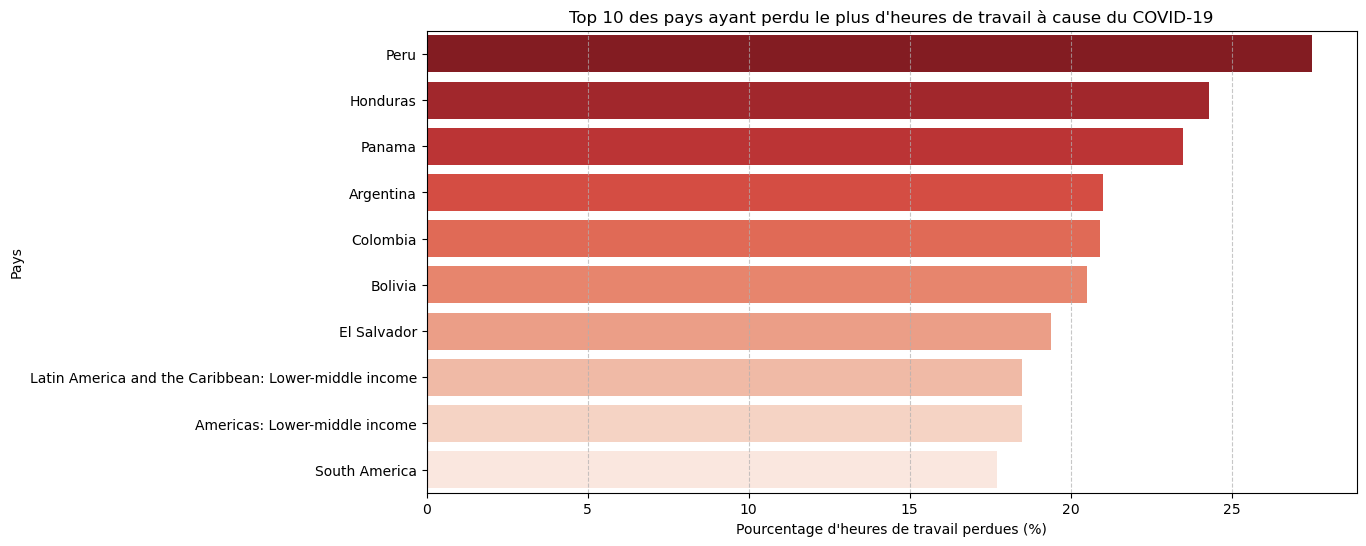

In [33]:
# Définir la figure
plt.figure(figsize=(12, 6))

# Créer le graphique en barres
sns.barplot(
    x="percentage_of_working_hrs_lost", 
    y="country", 
    data=top_10_countries, 
    palette="Reds_r"
)

# Ajouter les titres et labels
plt.xlabel("Pourcentage d'heures de travail perdues (%)")
plt.ylabel("Pays")
plt.title("Top 10 des pays ayant perdu le plus d'heures de travail à cause du COVID-19")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Afficher le graphique
plt.show()

31                  China
270                    G7
190                Africa
197    Sub-Saharan Africa
266                 ASEAN
76                  India
202        Eastern Africa
177         United States
75              Indonesia
204        Western Africa
Name: country, dtype: object


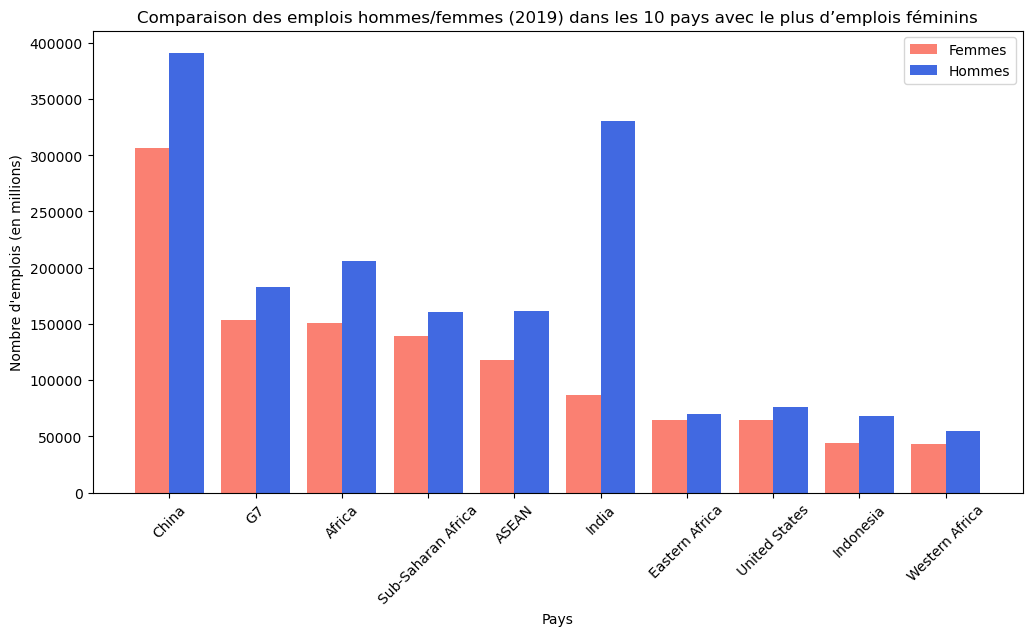

In [34]:
# Charger les bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des régions et catégories globales à exclure
excluded_terms = ["World", "G20", "Asia", "Pacific", "Europe", "America", "BRICS", "income"]

# Filtrer les vrais pays (exclure les régions/catégories)
df_countries_only = df[~df["country"].apply(lambda x: any(term in x for term in excluded_terms))]

# Trier et sélectionner les 10 pays avec le plus d’emplois féminins
top_10_female_employment = df_countries_only.sort_values(by="employed_female_25+_2019", ascending=False).head(10)

# Vérifier si les pays sélectionnés sont corrects
print(top_10_female_employment["country"])  # Vérification

# Définir la largeur des barres pour éviter qu'elles se superposent
bar_width = 0.4  
countries = top_10_female_employment["country"]

# Définir la figure
plt.figure(figsize=(12, 6))

# Positions pour les barres (côte à côte)
x_indexes = range(len(countries))

# Tracer les barres pour les femmes (en rouge)
plt.bar(x_indexes, 
        top_10_female_employment["employed_female_25+_2019"], 
        width=bar_width, 
        color="salmon", 
        label="Femmes")

# Tracer les barres pour les hommes (décalées vers la droite, en bleu)
plt.bar([x + bar_width for x in x_indexes], 
        top_10_female_employment["employed_male_25+_2019"], 
        width=bar_width, 
        color="royalblue", 
        label="Hommes")

# Ajouter les labels et le titre
plt.xlabel("Pays")
plt.ylabel("Nombre d'emplois (en millions)")
plt.title("Comparaison des emplois hommes/femmes (2019) dans les 10 pays avec le plus d’emplois féminins")

# Ajouter les noms des pays sous l'axe X
plt.xticks([x + bar_width/2 for x in x_indexes], countries, rotation=45)

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


In [35]:
df.info

<bound method DataFrame.info of                                   country  \
0                             Afghanistan   
1                                  Angola   
2                                 Albania   
3                    United Arab Emirates   
4                               Argentina   
..                                    ...   
278  Central and Western Asia: Low income   
279                                 Yemen   
280                          South Africa   
281                                Zambia   
282                              Zimbabwe   

     total_weekly_hours_worked(estimates_in_thousands)  \
0                                            350285.61   
1                                            457913.43   
2                                             49922.48   
3                                            320690.37   
4                                            525994.01   
..                                                 ...   
278                  

In [36]:
df.isnull().sum()

country                                                 0
total_weekly_hours_worked(estimates_in_thousands)       0
percentage_of_working_hrs_lost                          0
percent_hours_lost_40hrs_per_week                       0
percent_hours_lost_48hrs_per_week                       0
labour_dependency_ratio                                 0
employed_female_25+_2019                                0
employed_male_25+_2019                                  0
ratio_of_weekly_hours_worked_by_population_age_15-64    0
dtype: int64

In [37]:
df.head(3)

,country,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64
0,Afghanistan,350285.61,6.5,607.48,506.23,3.57,1334.24,5424.91,16.2
1,Angola,457913.43,8.6,1075.84,896.53,1.70,4612.11,4724.67,27.1
2,Albania,49922.48,3.9,51.09,42.57,1.77,500.11,651.87,25.5


In [38]:
df.columns = df.columns.str.strip()


In [39]:
df

,country,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64
0,Afghanistan,350285.61,6.5,607.48,506.23,3.57,1334.24,5424.91,16.2
1,Angola,457913.43,8.6,1075.84,896.53,1.70,4612.11,4724.67,27.1
2,Albania,49922.48,3.9,51.09,42.57,1.77,500.11,651.87,25.5
3,United Arab Emirates,320690.37,9.3,824.58,687.15,0.41,996.03,5111.77,38.6
4,Argentina,525994.01,21.0,3492.56,2910.47,1.43,7264.33,9496.19,18.1
...,...,...,...,...,...,...,...,...,...
278,Central and Western Asia: Low income,88915.24,3.2,73.56,61.30,3.05,666.43,1135.21,15.7
279,Yemen,241343.84,1.3,81.15,67.63,4.08,310.47,4376.27,13.9
280,South Africa,620660.71,13.6,2433.48,2027.90,2.60,6919.57,8697.14,15.9
281,Zambia,261419.96,2.6,173.06,144.22,1.85,2359.04,2609.58,26.4


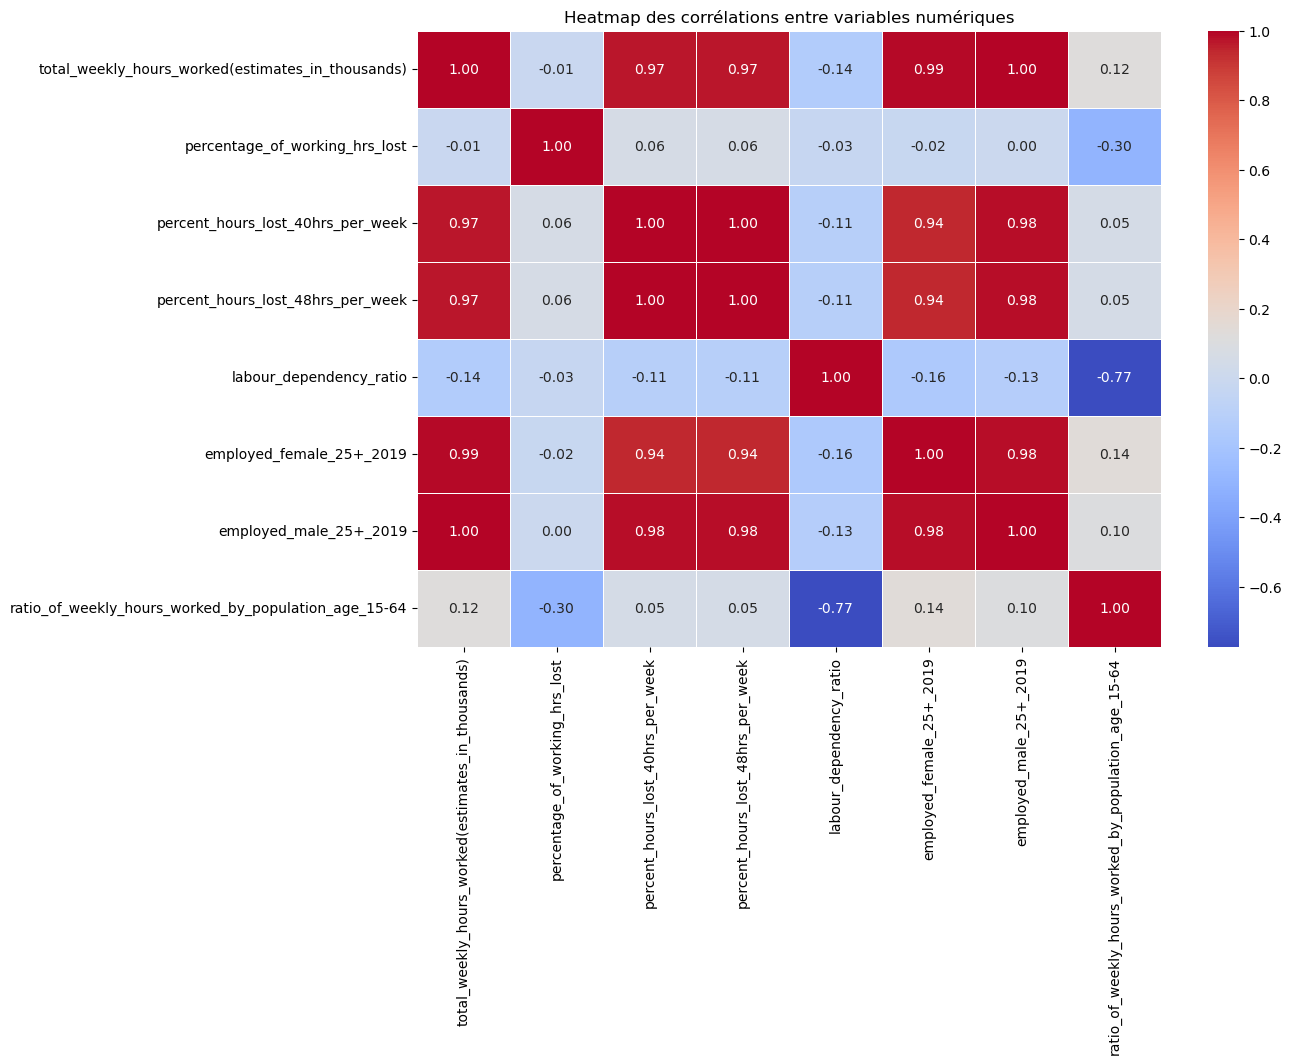

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv("employment_data.csv")  # Remplace par le bon nom si nécessaire

# Nettoyer les noms de colonnes (supprimer les espaces en trop)
df.columns = df.columns.str.strip()

# Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculer la matrice de corrélation
corr_matrix = df[numeric_columns].corr()

# Créer la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Ajouter un titre
plt.title("Heatmap des corrélations entre variables numériques")
plt.show()



In [42]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Charger les données
file_path = "employment_data.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

# Nettoyer les colonnes pour plus de lisibilité
rename_map = {
    'total_weekly_hours_worked(estimates_in_thousands)': 'weekly_hours',
    'percentage_of_working_hrs_lost': 'percent_hours_lost',
    'percent_hours_lost_40hrs_per_week': 'hours_lost_40h',
    'percent_hours_lost_48hrs_per_week': 'hours_lost_48h',
    'labour_dependency_ratio': 'labour_dep_ratio',
    'employed_female_25+_2019': 'female_2019',
    'employed_male_25+_2019': 'male_2019',
    'ratio_of_weekly_hours_worked_by_population_age_15-64': 'hours_per_pop_15_64'
}
df.rename(columns=rename_map, inplace=True)

# Initialiser Dash
app = dash.Dash(__name__)
app.title = "Impact COVID-19 sur l'emploi"

app.layout = html.Div([
    html.H1("Dashboard : Impact du COVID-19 sur l'emploi", style={'textAlign': 'center'}),

    dcc.Tabs([
        dcc.Tab(label="Pays les plus touchés", children=[
            dcc.Graph(
                id='lost-hours-graph',
                figure=px.bar(
                    df.sort_values(by='percent_hours_lost', ascending=False).head(10),
                    x='percent_hours_lost', y='country', orientation='h',
                    title="Top 10 des pays avec le plus d'heures de travail perdues (%)",
                    labels={"percent_hours_lost": "% d'heures perdues", "country": "Pays"},
                    color='percent_hours_lost', color_continuous_scale='Reds'
                )
            )
        ]),

        dcc.Tab(label="Emploi femmes vs hommes", children=[
            dcc.Graph(
                id='gender-graph',
                figure=go.Figure(
                    data=[
                        go.Bar(name='Femmes',
                               x=df.sort_values(by='female_2019', ascending=False).head(10)['country'],
                               y=df.sort_values(by='female_2019', ascending=False).head(10)['female_2019'],
                               marker_color='salmon'),
                        go.Bar(name='Hommes',
                               x=df.sort_values(by='female_2019', ascending=False).head(10)['country'],
                               y=df.sort_values(by='female_2019', ascending=False).head(10)['male_2019'],
                               marker_color='royalblue')
                    ]
                ).update_layout(
                    barmode='group',
                    title="Comparaison emploi femmes vs hommes (2019)",
                    xaxis_title="Pays",
                    yaxis_title="Emplois (en milliers)"
                )
            )
        ]),

        dcc.Tab(label="Corrélation dépendance/impact", children=[
            dcc.Graph(
                id='correlation-scatter',
                figure=px.scatter(
                    df, x='labour_dep_ratio', y='percent_hours_lost', hover_name='country',
                    title="Corrélation entre dépendance au travail et heures perdues",
                    labels={"labour_dep_ratio": "Dépendance au travail", "percent_hours_lost": "% Heures perdues"},
                    color='percent_hours_lost', color_continuous_scale='RdBu'
                )
            )
        ])
    ])
])

# Lancer le serveur
if __name__ == '__main__':
    app.run_server(debug=True)


ModuleNotFoundError: No module named 'dash'